In [1]:
import pandas as pd
import math 
import quandl
import numpy as np
import pickle
from sklearn import preprocessing, cross_validation ,svm
from sklearn.linear_model import LinearRegression
df=quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]


In [3]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])
x=preprocessing.scale(x)
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=.2)
clf=LinearRegression()
clf.fit(x_train,y_train)
acc=clf.score(x_test,y_test)
print(acc)

C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.971161276395


In [4]:
# save model with pickel
#clf=svm.SVR()
#clf.fit(x_train,y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
    
pickle_in=open('linearregression.pickle','rb')
clf=pickle.load(pickle_in)
acc=clf.score(x_test,y_test)
print(acc)

0.971161276395


ERROR:root:Line magic function `%matplotlin` not found.


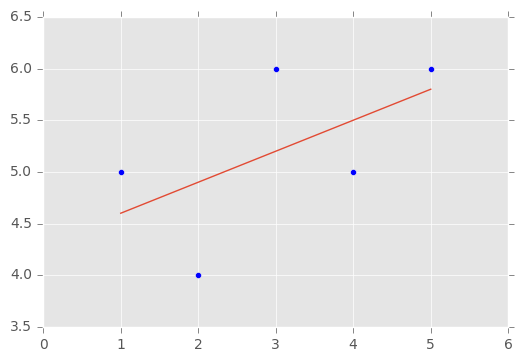

In [5]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)
# linear regression program
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlin inline
#best fit slope and intercept
def best_fit_slope_and_intercept(xs,ys):
     m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
     b = mean(ys) - m*mean(xs)
     return m,b

m,b= best_fit_slope_and_intercept(xs,ys)
linear_regression=[(m*x)+b  for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, linear_regression)
plt.show()


In [6]:
#square error
def squared_error(y_orig,y_line):
    return sum((y_line-y_orig)**2)

def coefficient_of_determination(y_orig,y_line):
    y_mean=[mean(y_orig) for y in y_orig]
    squared_error_regr =squared_error(y_orig,y_line)
    squared_error_mean=squared_error(y_orig,y_mean)
    return 1-(squared_error_regr /squared_error_mean)

print(coefficient_of_determination(ys,linear_regression))

0.321428571429
